# Assignment 1

1. Compare word frequencies between two works of a single author.
2. Compare word frequencies between works of two authors.
3. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

**For my MiniProject1, I utilized two recipes from Cookie + Kate for practice as well as for fun since it's one of my favorite places to get recipes. There were some challenges making sure all symbols such as the star ratings (★) not be included in this analysis. I also had challenges with the most used "word" being some sort of whitespace. Gutenberg proved to be the best source and was used for Problems 2-3 as well as Extra credit.**

### Problem 1
Compare word frequencies between two works of a single author.

**I used two recipes by one of my favorite recipe bloggers - Kate!**

I am practicing by utilizing BeautifulSoup, nltk modules, and regular expressions. I added 'reply', 'kate', and 'thank' to words I didn't care about, since I wanted to get data more relavent to the recipes. In addition, I added the character '★' to avoid star ratings in my word analysis. Just by looking at the plots, it's easy to tell which recipe is Tortilla soup and which is Peanut butter bars! I had issues with whitespace being the most frequent word in my analysis. After discussions about methods used by teammates, I was able to figure out how to exclude these from my results.

In [58]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# Define stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', 'reply', 'kate', 'thank', ' ', '  ', '', 'i’m']

# Remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# Remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # Escape ' with \'
    # Any character between brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=★\s]', "", w)
    #wn = re.sub('[a-zA-Z\s]+', "", w)
    # Get rid of numbers
    return re.sub('^[0-9\.\s]*$', "", wn)
       
# Define a function to get text/clean/calculate frequency
def get_wf (URL):
    # Get the web page
    r = requests .get(URL)
    
    # Now clean by removing html markup
    t = cleanHtml (r .text) .lower()
    
    # Split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # Remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # Calculate frequencies
    # Loops to create a dictionary
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    # Determine how many regular words in the document
    tw = 0
    for w in wf:
        tw += wf[w]   
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    # Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('https://cookieandkate.com/vegetarian-tortilla-soup/')
(wf_bu, tw_bu) = get_wf('https://cookieandkate.com/chocolate-peanut-butter-crispy-bars-recipe/')

[('pepper', 25), ('hominy', 26), ('powder', 27), ('one', 27), ('time', 28), ('recipes', 29), ('make', 30), ('peppers', 31), ('love', 36), ('made', 42), ('tortilla', 44), ('chili', 52), ('march', 78), ('recipe', 78), ('soup', 83)]
[('thanks', 23), ('free', 23), ('bars', 23), ('love', 26), ('time', 30), ('recipe', 33), ('march', 34), ('used', 34), ('made', 35), ('make', 35), ('rice', 40), ('april', 43), ('butter', 47), ('peanut', 49), ('chocolate', 74)]


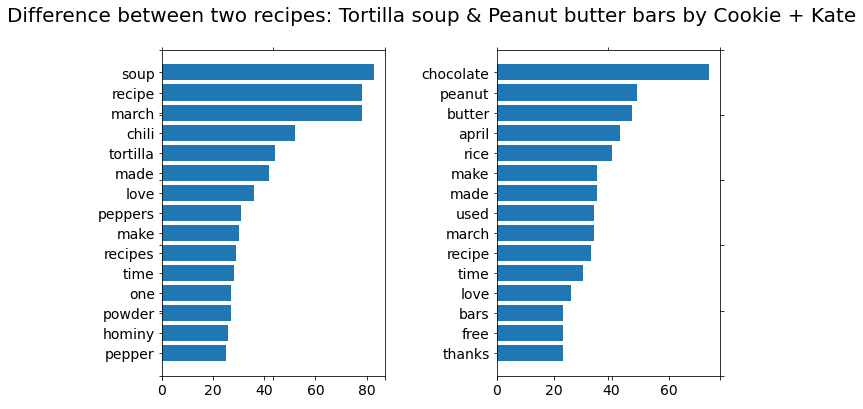

In [59]:
# Plot the results: there are noticeable differences in the recipes!
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots
    # First subplot
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    # Second subplot
    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

    print (wf_ee)
    print (wf_bu)
    
plotTwoLists (wf_ee, wf_bu, 'Difference between two recipes: Tortilla soup & Peanut butter bars by Cookie + Kate')

### Problem 2
Compare word frequencies between works of two authors.

**I used two gutenberg e-books: The Great Gatsby, by F. Scott Fitzgerald and The Iliad, by Homer**

I continued to use BeautifulSoup, nltk modules, and regular expressions. I found it interesting that the names gatsby and daisy were used so frequently, while names were not as frequent in The Iliad. Instead, The Iliad had more usage of early modern english words like 'thy'. I had less issues with whitespace with these two e-books. The subplots for the Gutenberg e-books proved to have the best looking results.

In [60]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# Define stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '“i', '']

# Remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# Remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # Escape ' with \'
    # Any character between brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # Get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# Define a function to get text/clean/calculate frequency
def get_wf (URL):
    # Get the web page
    r = requests .get(URL)
    
    # Now clean by removing html markup
    t = cleanHtml (r .text) .lower()
    
    # Split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # Remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # Calculate frequencies
    # Loops to create a dictionary
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    # Determine how many regular words in the document
    tw = 0
    for w in wf:
        tw += wf[w]       
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    # Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('https://www.gutenberg.org/cache/epub/64317/pg64317.txt')
(wf_bu, tw_bu) = get_wf('https://www.gutenberg.org/cache/epub/6130/pg6130.txt')

[('know', 84), ('eyes', 85), ('house', 85), ('man', 86), ('went', 90), ('project', 90), ('little', 102), ('back', 105), ('came', 108), ('like', 116), ('daisy', 135), ('one', 135), ('tom', 163), ('gatsby', 175), ('said', 232)]
[('god', 277), ('first', 284), ('jove', 306), ('war', 310), ('yet', 311), ('achilles', 313), ('thou', 336), ('one', 342), ('hector', 347), ('o’er', 363), ('arms', 426), ('great', 462), ('shall', 504), ('thus', 606), ('thy', 931)]


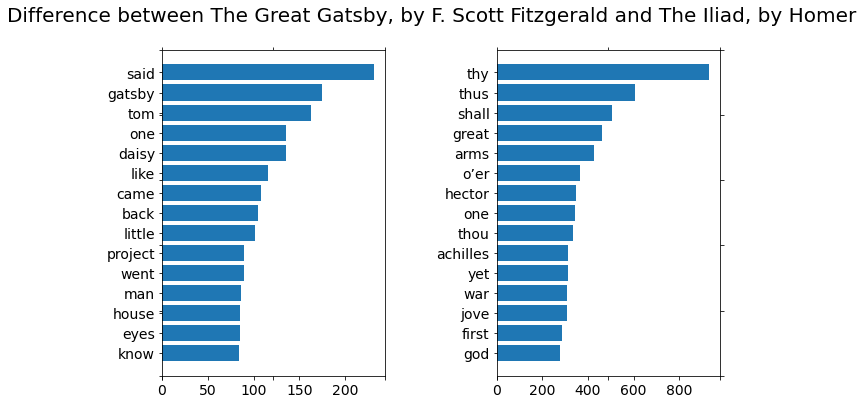

In [61]:
# Plot the results: the use of thy, thus, and shall are frequently used in the former book
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots
    # First subplot
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    # Second subplot
    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

    print (wf_ee)
    print (wf_bu)
    
plotTwoLists (wf_ee, wf_bu, 'Difference between The Great Gatsby, by F. Scott Fitzgerald and The Iliad, by Homer')

### Problem 3
Are there some words preferred by one author but used less frequently by another author?

**I used two gutenberg e-books: Dracula, by Bram Stoker and A Tale of Two Cities, by Charles Dickens**

For this problem, I practiced another method we learned in class by analyzing data with downloaded texts rather than websites. The word 'and' was most frequently used by both books. The word 'I' is preferred by Stoker, while first person 'I' is used less frequently by Dickens - about three times less. This helps us conclude that Dracula is likely written in first person while A Tale of Two Cities is not. After a quick search, I was able to confirm that Dracula is written in first person and A Tale of Two Cities is written in third person. Another item I noted was that 'he' was frequently used in both books. There may have been more male characters described in both.

In [62]:
# Change the script to utlize downloaded text files rather than websites
# Note the option errors='replace'
# without it python invariably runs into unicode errors
import re, operator

f = open ('Stoker.txt', 'r', encoding="ascii", errors='replace')
f2 = open ('Dickens.txt', 'r', encoding="ascii", errors='replace')
    
# What comes back includes headers and other HTTP info
# Get just the body of the response
t = f.read()
t2 = f2.read()

# Obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)
wds2 = re.split('\s+',t2)

# Populate dictionaries for both authors (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1
        
wf2 = {}
for w in wds2:
    if w in wf2: wf2 [w] = wf2 [w] + 1
    else:  wf2 [w] = 1

# Dictionaries can not be sorted, so get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   
wfs2 = sorted (wf2 .items(), key = operator .itemgetter (1), reverse=True)  

# Lets just have no more than 15 words 
ml = min(len(wfs),15)
print ("Dracula, by Bram Stoker\n")
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1])) 
    
print('\nA Tale of Two Cities, by Charles Dickens\n')    
ml2 = min(len(wfs2),15)
for i in range(1,ml2,1):
    print (wfs2[i][0]+"\t"+str(wfs2[i][1])) 

Dracula, by Bram Stoker

and	5637
I	4498
to	4465
of	3676
a	2890
in	2387
that	2321
he	1948
was	1792
as	1446
is	1431
for	1418
it	1409
his	1363

A Tale of Two Cities, by Charles Dickens

and	4745
of	4068
to	3460
a	2825
in	2450
his	1911
was	1674
that	1662
I	1446
he	1389
with	1288
had	1263
it	1173
as	1016


### Extra Credit
The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors?

**I used two gutenberg e-books: Great Expectations and A Tale of Two Cities, both by Charles Dickens**

This probability is based on the word 'and', which is the most used word by both books by the same author Charles Dickens. The probability of selecting 'and' would be around 0.0347 and 0.0341 for Great Expectations and A Tale of Two Cities, respectively. The binomial distributions between the two books, both by Charles Dickens, do not significantly differ.

In [63]:
# Change the script to utlize downloaded text files rather than websites
# Note the option errors='replace'
# without it python invariably runs into unicode errors
import re, operator
f = open ('Expectations.txt', 'r', encoding="ascii", errors='replace')
f2 = open ('Dickens.txt', 'r', encoding="ascii", errors='replace')
    
# What comes back includes headers and other HTTP info
# Get just the body of the response
t = f.read()
t2 = f2.read()

# Obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)
wds2 = re.split('\s+',t2)

# Populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1
        
wf2 = {}
for w in wds2:
    if w in wf2: wf2 [w] = wf2 [w] + 1
    else:  wf2 [w] = 1

# Determine how many regular words in the document
tw = 0
for w in wf:
    tw += wf[w]

tw2 = 0
for w in wf2:
    tw2 += wf2[w]
        
# Dictionaries cannot be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   
wfs2 = sorted (wf2 .items(), key = operator .itemgetter (1), reverse=True)  

# Lets just have no more than 15 words 
print ("Great Expectations by Charles Dickens\n")
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1])) 
print ("\nTotal words:", tw)
print ("\nProbability:", wfs[1][1]/tw)
    
print('\n')   
print("A Tale of Two Cities by Charles Dickens\n")
ml2 = min(len(wfs2),15)
for i in range(1,ml2,1):
    print (wfs2[i][0]+"\t"+str(wfs2[i][1])) 
print ("\nTotal words:", tw2)
print ("\nProbability:", wfs2[1][1]/tw2)

Great Expectations by Charles Dickens

and	6506
I	5644
to	5019
of	4450
a	3931
in	2850
was	2675
that	2643
had	2055
my	1927
his	1795
he	1733
with	1727
it	1606

Total words: 187518

Probability: 0.03469533591441888


A Tale of Two Cities by Charles Dickens

and	4745
of	4068
to	3460
a	2825
in	2450
his	1911
was	1674
that	1662
I	1446
he	1389
with	1288
had	1263
it	1173
as	1016

Total words: 138966

Probability: 0.034145042672308334


# Presentation

### What is the question?
- My question is, can we tell what type of meal a recipe is without looking at the title? With the analysis of the two recipes provided, I believe the answer is yes. I was able to gather that one dish was a soup and the other a snack or dessert. Regarding the books, I wanted to see what the frequency of words might tell me about the type of book.

### What was the approach?
- The approach was to utilize word frequency to perform data analysis. For problems 1-2, by utilizing BeautifulSoup, nltk modules, and regular expressions, we could make the data more pertinent. For instance, I added 'reply', 'kate', and 'thank' to words I didn't care about, since I wanted to get data more relavent to the recipes. In addition, I added the character '★' to avoid star ratings in my word analysis. For problem 3, I practiced another method we learned in class by analyzing data with downloaded texts rather than websites. The extra credit problem focuses on finding the binomial distributions and probability based on a specific word and reguar words.

### What problems did I encounter?
- In problem 1, I had issues with whitespace being the most frequent word in my analysis, which I believe were tabs, spaces, or endlines. I was able to solve this problem after hearing suggestions made by teammates. I had less issues with whitespace with e-books.

### What results did I get?
1. Just by looking at the plots, it's easy to tell which recipe is Tortilla soup and which is Peanut butter bars.

2. I found it interesting that the names gatsby and daisy were used so frequently, while names were not as frequent in The Iliad. Instead, The Iliad had more usage of early modern english words like 'thy'. The subplots for the Gutenberg e-books proved to have the best looking results.

3. The word 'and' was most frequently used by both books in problem 3. The word 'I' is preferred by Stoker, while first person 'I' is used less frequently by Dickens - about three times less. This helps us conclude that Dracula is likely written in first person while A Tale of Two Cities is not. After a quick search, I was able to confirm that Dracula is written in first person and A Tale of Two Cities is written in third person. Another item I noted was that 'he' was frequently used in both books. There may have been more male characters described in both.

4. The word 'and' is the most used word by both books by the same author Charles Dickens. The probability of selecting 'and' would be around 0.0347 and 0.0341 for Great Expectations and A Tale of Two Cities, respectively. The binomial distributions between the two books, both by Charles Dickens, do not significantly differ.

### What new ideas did this generate?
- Analyzing the frequency of the words for recipes could help a user when searching with keywords for specific types of recipes or specific ingredients. My follow up question is, could a user perform a keyword search and actually find what they are looking for? It would be interesting to get the data on if the user did or did not find what they were after.
- Another interesting idea would be to look at the word frequency to determine characteristics of the main character or the narrator.